In [2]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set_theme()
sns.set_style("dark")

## Load extracted features

In [3]:
data_basepath = './n96ncsr5g4-1'
url_features_path = './url_features.json'
html_features_path = './html_features.json'

In [4]:
with open(url_features_path) as f:
    url_features = json.load(f)
    
with open(html_features_path) as f:
    html_features = json.load(f)

In [5]:
features = {}
for k in url_features.keys():
    url_feat = url_features[k]
    html_feat = html_features[k]
    
    url_feat.update(html_feat)
    features[k] = url_feat

In [6]:
df = pd.DataFrame.from_dict(features, orient='index')
df.head()

,label,url_length,num_subdomains,uses_https,contains_ip,contains_phishing_keywords,contains_at_symbol,url_depth,is_shortened_url,is_punycode,...,login_form_present,javascript_redirects_present,iframes_count,num_obfuscated_scripts,external_js_inclusion,num_inline_styles,num_script_tags,num_iframe_tags,num_img_tags,num_a_tags
1,1,34,2,False,False,False,False,3,False,False,...,False,False,0,0,False,8,1,0,4,1
2,0,40,3,True,False,False,False,2,False,False,...,False,False,0,0,False,4,4,0,2,7
3,0,48,3,True,False,False,False,3,False,False,...,False,False,0,0,True,3,8,0,5,77
4,0,52,3,True,False,False,False,4,False,False,...,False,False,1,0,False,10,6,1,19,150
5,0,33,4,True,False,False,False,2,False,False,...,False,False,1,1,True,5,17,1,12,58


## Check for missing values

In [7]:
df.isnull().sum()

label                           0
url_length                      0
num_subdomains                  0
uses_https                      0
contains_ip                     0
contains_phishing_keywords      0
contains_at_symbol              0
url_depth                       0
is_shortened_url                0
is_punycode                     0
has_redirection                 0
is_domain_valid                 0
days_until_expiration           0
registration_length             0
num_forms                       0
num_username_fields             0
num_password_fields             0
num_hidden_fields               0
form_action                     0
form_autocomplete               0
external_links_count            0
login_form_present              0
javascript_redirects_present    0
iframes_count                   0
num_obfuscated_scripts          0
external_js_inclusion           0
num_inline_styles               0
num_script_tags                 0
num_iframe_tags                 0
num_img_tags  

## Convert categorical features to one-hot

In [8]:
dummy_feats = pd.get_dummies(df['form_action'], drop_first=True, prefix='form_action')
df = pd.concat([df.drop('form_action', axis=1), dummy_feats], axis=1)
df.head()

,label,url_length,num_subdomains,uses_https,contains_ip,contains_phishing_keywords,contains_at_symbol,url_depth,is_shortened_url,is_punycode,...,num_obfuscated_scripts,external_js_inclusion,num_inline_styles,num_script_tags,num_iframe_tags,num_img_tags,num_a_tags,form_action_1,form_action_2,form_action_3
1,1,34,2,False,False,False,False,3,False,False,...,0,False,8,1,0,4,1,False,False,True
2,0,40,3,True,False,False,False,2,False,False,...,0,False,4,4,0,2,7,False,True,False
3,0,48,3,True,False,False,False,3,False,False,...,0,True,3,8,0,5,77,True,False,False
4,0,52,3,True,False,False,False,4,False,False,...,0,False,10,6,1,19,150,False,True,False
5,0,33,4,True,False,False,False,2,False,False,...,1,True,5,17,1,12,58,False,False,True


In [10]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00ta 0:00:01
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 21.0 MB/s eta 0:00:0000:010:01
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 20.0 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


## Split into training and test set

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1).to_numpy().astype(float)
y = df['label'].to_numpy()

test_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print(f'Number of training samples: {X_train.shape}')
print(f'Number of test samples: {X_test.shape}')

Number of training samples: (64000, 32)
Number of test samples: (16000, 32)


In [12]:
cont_feats = {
    "url_length",
    "url_depth",
    "days_until_expiration",
    "registration_length",
    "num_forms",
    "num_username_fields",
    "num_password_fields",
    "num_hidden_fields",
    "form_autocomplete",
    "external_links_count",
    "iframes_count",
    "num_obfuscated_scripts",
    "num_inline_styles",
    "num_script_tags",
    "num_iframe_tags",
    "num_img_tags",
    "num_a_tags",
  }
columns = df.columns[1:]
cont_ids = [i for i, c in enumerate(columns) if c in cont_feats]

mean = X_train[:, cont_ids].mean(axis=0, keepdims=True)
std = X_train[:, cont_ids].std(axis=0, keepdims=True)
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_train_norm[:, cont_ids] = (X_train[:, cont_ids] - mean) / std
X_test_norm[:, cont_ids] = (X_test[:, cont_ids] - mean) / std

In [13]:
from sklearn import metrics

def compute_model_metrics(model, X, y_true):
    y_pred = model.predict(X)
    
    print("Confusion Matrix")
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(2, 2))
    ax = sns.heatmap(confusion_matrix, cmap="crest",  annot=True, fmt="d", linewidths=.1)
    xticks = [i + 0.5 for i in range(2)]
    ax.set_xticks(
        xticks, ['legitimate', 'phishing'], rotation=45, ha='right'
    )
    ax.set_yticks(
        xticks, ['legitimate', 'phishing'], rotation=0, va='top'
    )
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    plt.show()

    report = metrics.classification_report(
        y_true, y_pred, target_names=['legitimate', 'phishing'], digits=4
    )
    print(report)
    test_acc = metrics.accuracy_score(y_true, y_pred)
    print(f'Accuracy: {test_acc:.4f}')
    
    test_precision = metrics.precision_score(y_true, y_pred, average='micro')
    print(f'Micro Precision: {test_precision:.4f}')
        
    test_recall = metrics.recall_score(y_true, y_pred, average='micro')
    print(f'Micro Recall/TPR: {test_recall:.4f}')
    
    test_f1 = metrics.f1_score(y_true, y_pred, average='micro')
    print(f'Micro f1-score: {test_f1:.4f}')

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.87


/Users/sakshijain/Desktop/ML/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


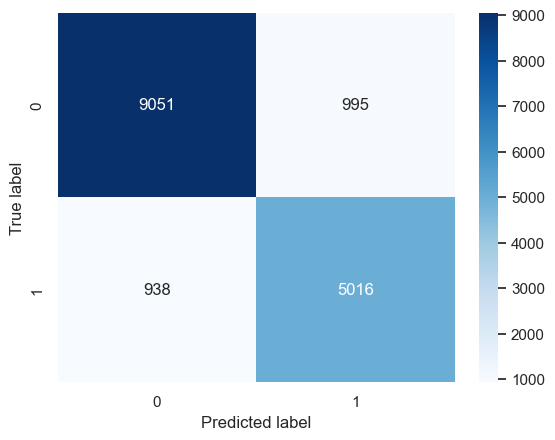

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     10046
           1       0.83      0.84      0.84      5954

    accuracy                           0.88     16000
   macro avg       0.87      0.87      0.87     16000
weighted avg       0.88      0.88      0.88     16000

Accuracy: 0.8792
Micro Precision: 0.8792
Micro Recall/TPR: 0.8792
Micro F1-score: 0.8792


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train_norm, y_train, X_test_norm, and y_test are already defined and normalized

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_norm, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_norm)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the accuracy of the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

# Additionally, calculate the micro-averaged metrics if needed
print(f"Micro Precision: {precision_score(y_test, y_pred, average='micro'):.4f}")
print(f"Micro Recall/TPR: {recall_score(y_test, y_pred, average='micro'):.4f}")
print(f"Micro F1-score: {f1_score(y_test, y_pred, average='micro'):.4f}")


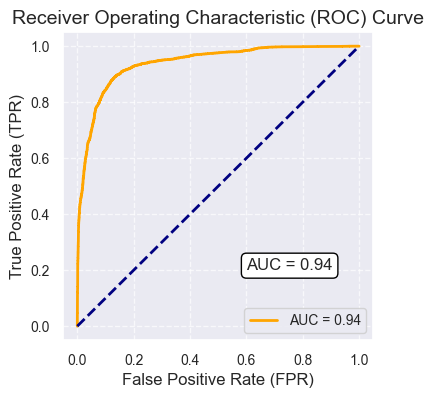

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(4, 4))

    # Plot ROC curve with enhanced visuals
    plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Customize plot appearance
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
    plt.xlabel('False Positive Rate (FPR)', fontsize=12)
    plt.ylabel('True Positive Rate (TPR)', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Highlight the AUC value
    plt.text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

    # Customize legend
    plt.legend(loc='lower right', fontsize=10)

    # Show the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Assuming log_reg is your trained Logistic Regression model and X_test_norm is your normalized test set
y_scores = log_reg.predict_proba(X_test_norm)[:, 1]  # Probability of the positive class
plot_roc_curve(y_test, y_scores)

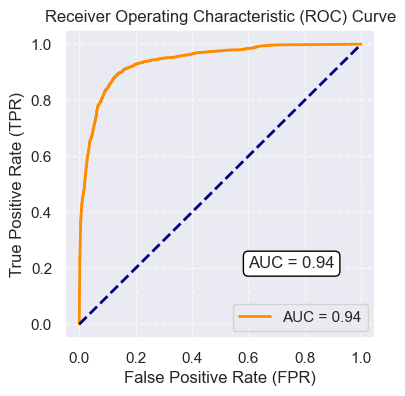

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(4, 4))

    # Plot ROC curve with enhanced visuals
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Customize plot appearance
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    
    # Customize legend
    plt.legend(loc='lower right')
    
    # Highlight the AUC value
    plt.text(0.6, 0.2, f'AUC = {auc:.2f}', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

    # Show the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Assuming log_reg is your trained Logistic Regression model and X_test_norm is your normalized test set
y_scores = log_reg.predict_proba(X_test_norm)[:, 1]  # Probability of the positive class
plot_roc_curve(y_test, y_scores)

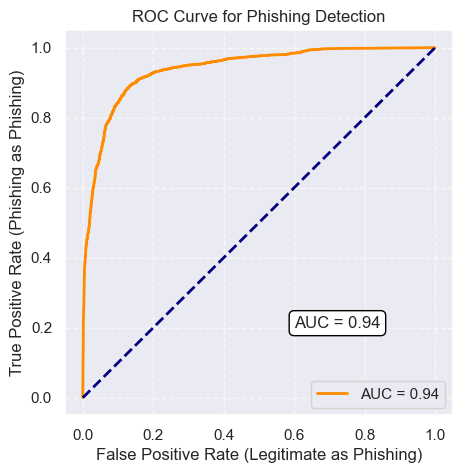

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(5, 5))

    # Plot ROC curve with enhanced visuals
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Customize plot appearance
    plt.title('ROC Curve for Phishing Detection')
    plt.xlabel('False Positive Rate (Legitimate as Phishing)')
    plt.ylabel('True Positive Rate (Phishing as Phishing)')
    
    # Customize legend
    plt.legend(loc='lower right')
    
    # Highlight the AUC value
    plt.text(0.6, 0.2, f'AUC = {auc:.2f}', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

    # Show the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Assuming log_reg is your trained Logistic Regression model and X_test_norm is your normalized test set
y_scores = log_reg.predict_proba(X_test_norm)[:, 1]  # Probability of the positive class (Phishing)
plot_roc_curve(y_test, y_scores)
